*OBS: É importante que as células sejam executadas em ordem (Ctrl + F9 para executar tudo).*

In [ ]:
!wget -O 'bolhas.png' 'https://github.com/brunaeloisa/brunaeloisa.github.io/blob/main/imagens/bolhas.png?raw=true'
!wget -O 'bolhas_modif.png' 'https://github.com/brunaeloisa/brunaeloisa.github.io/blob/main/imagens/bolhas_modif.png?raw=true'

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

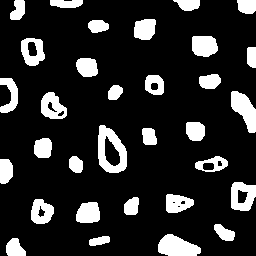

In [ ]:
arquivo = 'bolhas_modif.png'
img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

altura, largura = img.shape

Foram retiradas 11 bolhas que tocavam a borda.


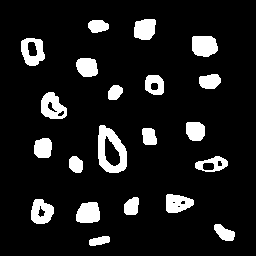

In [ ]:
img_aux = img.copy()
num_bolhas_borda = 0

# Eliminando bolhas que tocam as bordas, transformando-as em plano de fundo
for i in range(altura):
    if img_aux[i,0] == 255:
        cv2.floodFill(img_aux, None, (0,i), 0)
        num_bolhas_borda += 1
    if img_aux[i,largura-1] == 255:
        cv2.floodFill(img_aux, None, (largura-1,i), 0)
        num_bolhas_borda += 1

for j in range(largura):
    if img_aux[0,j] == 255:
        cv2.floodFill(img_aux, None, (j,0), 0)
        num_bolhas_borda += 1
    if img_aux[altura-1,j] == 255:
        cv2.floodFill(img_aux, None, (j,altura-1), 0)
        num_bolhas_borda += 1

print(f'Foram retiradas {num_bolhas_borda} bolhas que tocavam a borda.')
cv2_imshow(img_aux)

A figura tem 21 bolhas.


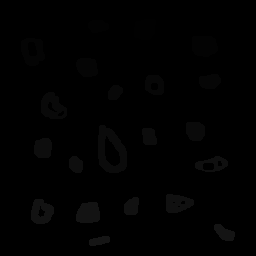

In [ ]:
num_bolhas = 0

for i in range(altura):
    for j in range(largura):
      if img_aux[i,j] == 255:
        num_bolhas += 1
        cv2.floodFill(img_aux, None, (j,i), num_bolhas)

print('A figura tem {} bolhas.'.format(num_bolhas))
cv2_imshow(img_aux)

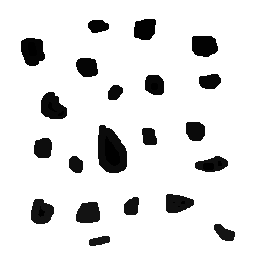

In [ ]:
# altera a cor do fundo
cv2.floodFill(img_aux, None, (0,0), 255)
cv2_imshow(img_aux)

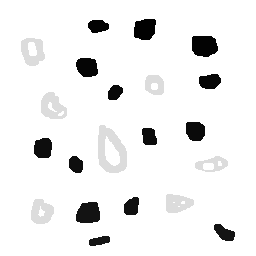

A figura tem 7 bolhas com buracos e 14 bolhas sem buracos.


In [ ]:
num_bolhas_buracos = 0

for i in range(1, altura):
    for j in range(1, largura):
      if img_aux[i,j] == 0:
        cv2.floodFill(img_aux, None, (j,i), 255)
        if img_aux[i,j-1] != 220:
          cv2.floodFill(img_aux, None, (j-1,i), 220)
          num_bolhas_buracos += 1

cv2_imshow(img_aux)
print(f'A figura tem {num_bolhas_buracos} bolhas com buracos e {num_bolhas - num_bolhas_buracos} bolhas sem buracos.')